# Least Squares

In [37]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import clear_output, display

In [59]:
def poly_fit(x, y, n):
    m = np.size(x)
    A = np.zeros([n+1,n+1])
    b = np.zeros(n+1)
    A_tmp = np.zeros(2*n+1)
    for i in range(2*n+1):
        for j in range(m):
            A_tmp[i] += x[j]**i
            if (i < n+1):
                b[i] += x[j]**i*y[j]
    for i in range(n+1):
        A[i] = A_tmp[i:i+n+1]
    a = np.linalg.solve(A, b)
    return a

In [60]:
def plot_fun(fun, a, b, c='k'):
    num = 200
    x = np.linspace(a, b, num+1)
    y = np.zeros(num+1)
    for i in range(num+1):
        y[i] = fun(x[i])
    plt.plot(x, y, c, linewidth=3)

[ 4.60000072e+00 -6.89949590e+00  6.37248922e+00 -2.62763386e+00
  6.29842412e-01 -8.30310677e-02  5.54738735e-03 -1.45891754e-04
  3.45710449e-13  1.62594371e-14  5.61318310e-16  1.06994888e-17]


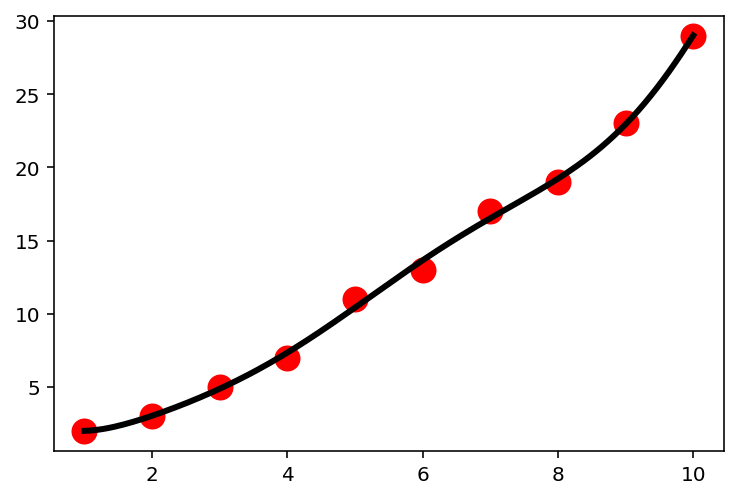

In [68]:
x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([2,3,5,7,11,13,17,19,23,29])

plt.plot(x, y, 'ro', markersize=12, linewidth=3)
a = poly_fit(x, y, 11)
print (a)

def fitting_fun(a, x):
    n = np.size(a)
    y = a[n-1]
    for i in range(n-1):
        y = y*x + a[n-2-i]
    return y
#print (fitting_fun(a,0))
def fun(x):
    return fitting_fun(a,x)
plot_fun(fun, 1, 10)

In [41]:
3/8*(3*np.log(4/3)+3*np.log(5/3) + np.log(2))/3

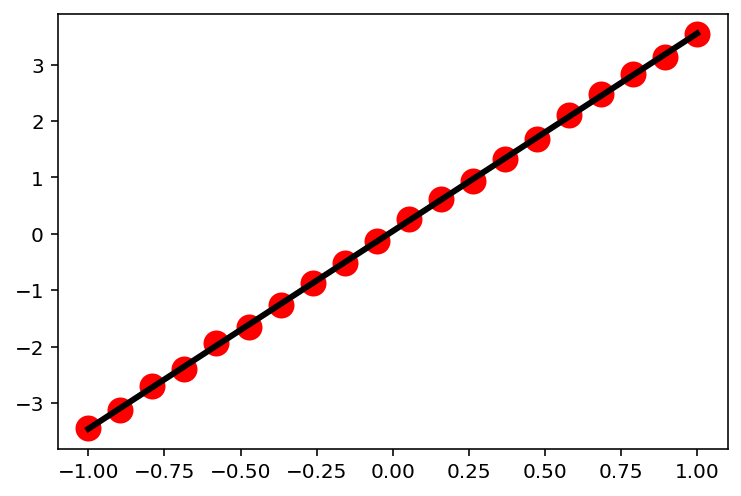

In [62]:
def fun1(x):
    #return x**3 - x**2 + x
    return 3.5*x
    
m = 20
x = np.linspace(-1,1,m)
y = np.zeros(m)
for i in range(m):
    y[i] = fun1(x[i])  
y = y + 0.1*np.random.rand(m)

plt.plot(x, y, 'ro', markersize=12, linewidth=3)
a = poly_fit(x, y, 1)


plot_fun(fun, -1, 1)

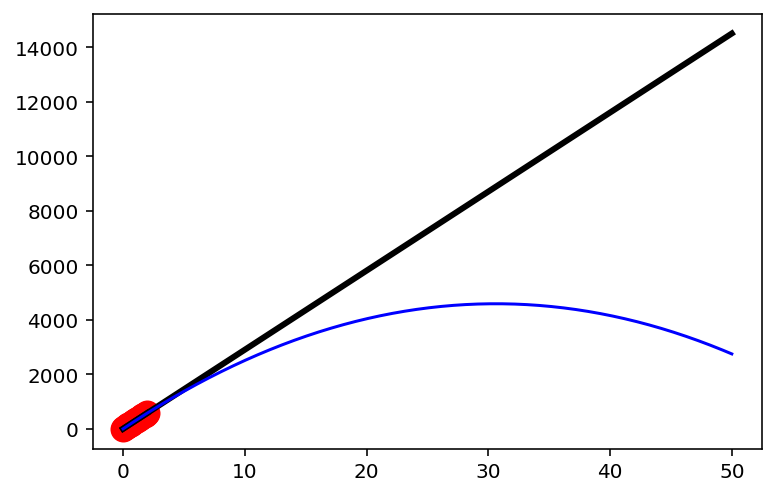

In [72]:
def fun2(t):
    #return x**3 - x**2 + x
    return 300*t - 4.9*t*t
    
m = 20
x = np.linspace(0,2,m)
y = np.zeros(m)
for i in range(m):
    y[i] = fun2(x[i])  
# y = y + 0.1*np.random.rand(m)

plt.plot(x, y, 'ro', markersize=12, linewidth=3)
a = poly_fit(x, y, 1)

plot_fun(fun, 0, 2)

# longer range
t = 50
plot_fun(fun, 0, t)
x = np.linspace(0,t,200)
plt.plot(x, fun2(x),'b')

[-1.73728814  2.55084746]
[0.43801653 1.08953168 0.16391185]


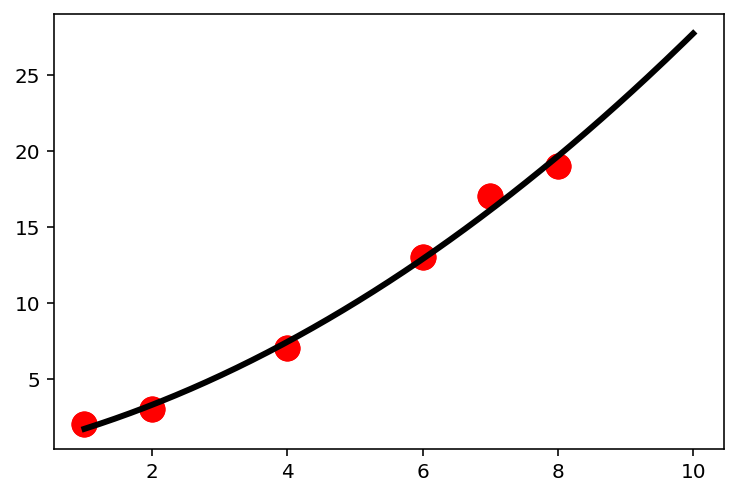

In [73]:
x = np.array([1,2,4,6,7,8])
y = np.array([2,3,7,13,17,19])

plt.plot(x, y, 'ro', markersize=12, linewidth=3)
a = poly_fit(x, y, 1)
print (a)

plt.plot(x, y, 'ro', markersize=12, linewidth=3)
a = poly_fit(x, y, 2)
print (a)


def fitting_fun(a, x):
    n = np.size(a)
    y = a[n-1]
    for i in range(n-1):
        y = y*x + a[n-2-i]
    return y
#print (fitting_fun(a,0))
def fun(x):
    return fitting_fun(a,x)
plot_fun(fun, 1, 10)

In [8]:
print(np.polyfit(x,y,1))
print(np.polyfit(x,y,2))

[ 2.55084746 -1.73728814]
[0.16391185 1.08953168 0.43801653]


[0.85714286 1.07142857]
[1.07142857 0.85714286]


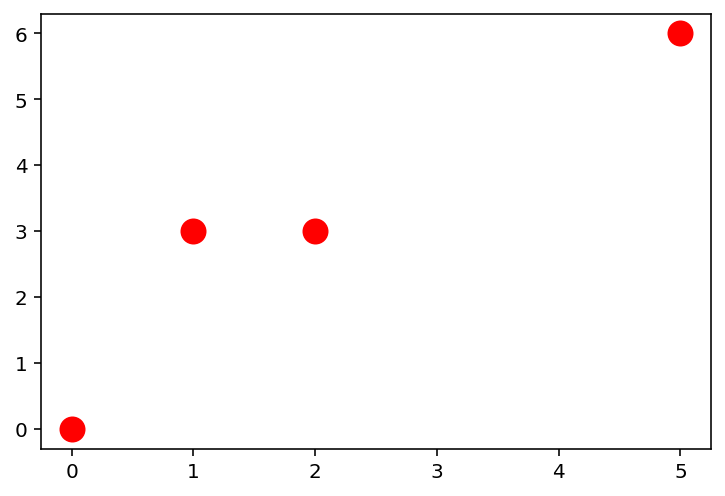

In [9]:
x = np.array([0,1,2,5])
y = np.array([0,3,3,6])
plt.plot(x, y, 'ro', markersize=12, linewidth=3)
a = poly_fit(x, y, 1)
print (a)
print(np.polyfit(x,y,1))

In [10]:
from sympy import *

init_printing()

In [11]:
x = Matrix([[1],[2],[4],[6],[7],[8]])
y = Matrix([[2],[3],[7],[13],[17],[19]])

In [12]:
A1 = Matrix([[1, 1],[1, 2],[1, 4],[1, 6],[1, 7],[1, 8]])
A2 = Matrix([[1, 1, 1],[1, 2, 4],[1, 4, 16],[1, 6, 36],[1, 7, 49],[1, 8, 64]])

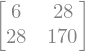

In [13]:
A = A1.transpose()*A1
A

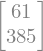

In [14]:
b = A1.transpose()*y
b

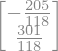

In [15]:
a = A.inv()*b
a

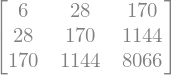

In [16]:
A = A2.transpose()*A2
A

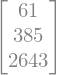

In [17]:
b = A2.transpose()*y
b

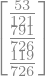

In [18]:
a = A.inv()*b
a

In [19]:
A3 = Matrix([[1, 0],[1, 1],[1, 2],[1, 5]])
y = Matrix([[0],[3],[3],[6]])
A = A3.transpose()*A3
b = A3.transpose()*y
a = A.inv()*b
print(A,b,a)

Matrix([[4, 8], [8, 30]]) Matrix([[12], [39]]) Matrix([[6/7], [15/14]])


In [20]:
A = np.array([[-4, 14, 0],[-5,13,0],[-1,0,2]])
A

array([[-4, 14,  0],
       [-5, 13,  0],
       [-1,  0,  2]])

In [21]:
x0 = np.array([1,1,1])
x1 = np.dot(A, x0)
print (x1)

[10  8  1]


In [22]:
y1 = x1/np.linalg.norm(x1)
y1

array([0.77849894, 0.62279916, 0.07784989])

In [23]:
lambda1 = np.dot(x0,np.dot(A,x0))/np.dot(x0,x0)
print (lambda1)

6.333333333333333


In [24]:
np.linalg.eig(A)

(array([2., 6., 3.]),
 array([[ 0.        ,  0.79740048,  0.66666667],
        [ 0.        ,  0.56957177,  0.33333333],
        [ 1.        , -0.19935012, -0.66666667]]))

In [25]:
np.linalg.norm(np.array([10,8,1]))**2

In [26]:
np.dot(A,np.array([10,8,1]))

array([72, 54, -8])

In [27]:
np.dot(Out[54],np.array([10,8,1]))

KeyError: 54

In [ ]:
1144/165

In [ ]:
104/15

In [ ]:
np.dot(np.array([10,8,1]),np.dot(A,np.array([10,8,1])))


In [ ]:
A4 = Matrix([[1, 0, 0],[1, 1, 1],[1, 2, 4],[1, 5, 25]])
y = Matrix([[0],[3],[3],[6]])
A = A4.transpose()*A4
b = A4.transpose()*y
a = A.inv()*b
print(A,b,a)
print(A)
print(b)
print(a)

In [ ]:
x = Symbol('x')

In [ ]:
solve(x -3, x)

In [ ]:
solve(x**2 - 3, x)

In [ ]:
solve(x**2 - 2.66*x + 0.488 - 0.64**2, x)

In [ ]:
(x - factor1/5)*(x - 61/25) - 256/625

In [ ]:
simplify(Out[37])

In [ ]:
expand(Out[37])

In [ ]:
solve(Out[39], x)

In [ ]:
solve(10000*x**2 - 26400*x + 784, x)

In [ ]:
expand((x - 1.16)*(x-1.48) - 1.28**2)

In [ ]:
Out[41][1]

In [ ]:
Out[41][1]/Out[41][0]

In [ ]:
simplify(Out[44])

In [ ]:
sqrt(Out[45])

In [ ]:
simplify(Out[46])

In [ ]:
f(x)

$\begin{bmatrix} 1\\ 2 \\ 3\end{bmatrix}$